# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/3_sql


## Create sqlite data base

In [2]:
# Create data base
conn = sqlite3.connect('restaraunts_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

restaraunts_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS restaurants_table (
    orderId VARCHAR(50),
    restaurant_name VARCHAR(200),
    total_stars DECIMAL(8,2),
    number_of_reviews DECIMAL(8,2),
    cuisine_type VARCHAR(200),
    price_class VARCHAR(200),
    raw_description VARCHAR(200),
    opening_times VARCHAR(200),
    address VARCHAR(200),
    amenities VARCHAR(200),
    district VARCHAR(200),
    lat DECIMAL(10,8),
    long DECIMAL(11,8)
)''')
conn.commit()

## Read data from file to data frame

In [4]:
import pandas as pd

df = pd.read_csv('restaurant_data_zuerich.csv', 
                 sep=',', 
                 encoding='utf-8', 
                 usecols=['web-scraper-order', 'restaurant_name', 'total_stars', 
                          'number_of_reviews', 'cuisine_type', 'price_class', 
                          'raw_description', 'opening_times', 'address', 
                          'amenities', 'district', 'long_lat', 'lat', 'long'])

print(df.shape)
df.head(5)


(239, 14)


,web-scraper-order,restaurant_name,total_stars,number_of_reviews,cuisine_type,price_class,raw_description,opening_times,address,amenities,district,long_lat,lat,long
0,1704906267-1,Restaurant Pflug,4.0,(9 reviews),Schweizer Küche,$$$,NaN,"12:00 PM - 2:00 PM, 6:30 PM - 12:00 AM (Folgetag)",Brauerstrasse 74 8004 Zürich,Reservationen möglichKeine MitnahmeModerate La...,Kreis 4,https://maps.googleapis.com/maps/api/staticmap...,47.379016,8.524960
1,1704906272-2,Ototo,4.3,(7 reviews),Sushi,$$$,NaN,5:30 PM - 11:00 PM,Nordstrasse 199 8037 Zürich,Reservationen möglichLieferung möglichBestellu...,Kreis 10,https://maps.googleapis.com/maps/api/staticmap...,47.392527,8.530738
2,1704906276-3,Tschingg,3.8,(6 reviews),Italienisch,$$,NaN,9:00 AM - 8:00 PM,Schaffhauserstrasse 353 8050 Zürich,Keine ReservierungenFür Gruppen geeignetFür Ki...,Kreis 11,https://maps.googleapis.com/maps/api/staticmap...,47.409786,8.546027
3,1704906281-4,Karl der Grosse,4.0,(4 reviews),Schweizer Küche,$$,NaN,8:00 AM - 11:00 PM,Kirchgasse 14 8001 Zürich,Reservationen möglichKein LieferserviceKeine M...,Kreis 1,https://maps.googleapis.com/maps/api/staticmap...,47.369761,8.544650
4,1704906286-5,L'Altro,5.0,(7 reviews),Italienisch,$$$,NaN,"11:30 AM - 2:30 PM, 5:30 PM - 12:00 AM (Folgetag)",Sternenstrasse 11 8002 Zürich,Reservationen möglichKeine MitnahmeSitzplätze ...,Kreis 2,https://maps.googleapis.com/maps/api/staticmap...,47.360064,8.534062


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'restaurants_table',
          con = conn,
          index = False,
          if_exists = 'replace')

239

## Query the SQL-table

In [6]:
# Query der SQL-Tabelle
cursor.execute('''SELECT   restaurant_name, total_stars, number_of_reviews, cuisine_type, 
                          price_class, raw_description, opening_times, address, amenities, 
                          district, lat, long
                   FROM restaurants_table
                   WHERE number_of_reviews >= 1 AND total_stars >= 3.5''')

# Erstellen eines DataFrames aus den abgerufenen Daten
df = pd.DataFrame(cursor.fetchall(), 
                  columns=[ 'RestaurantName', 'TotalStars', 'NumberOfReviews', 'CuisineType', 
                           'PriceClass', 'RawDescription', 'OpeningTimes', 'Address', 'Amenities', 
                           'District', 'Latitude', 'Longitude'])    
df


,RestaurantName,TotalStars,NumberOfReviews,CuisineType,PriceClass,RawDescription,OpeningTimes,Address,Amenities,District,Latitude,Longitude


## Plot histogramm of rental prices

Spalten im DataFrame: Index(['web-scraper-order', 'web-scraper-start-url', 'detail_link',
       'detail_link-href', 'restaurant_name', 'total_stars',
       'number_of_reviews', 'cuisine_type', 'price_class', 'raw_description',
       'opening_times', 'address', 'amenities', 'district', 'long_lat', 'lat',
       'long'],
      dtype='object')
Ist 'total_stars' in den Spalten: True


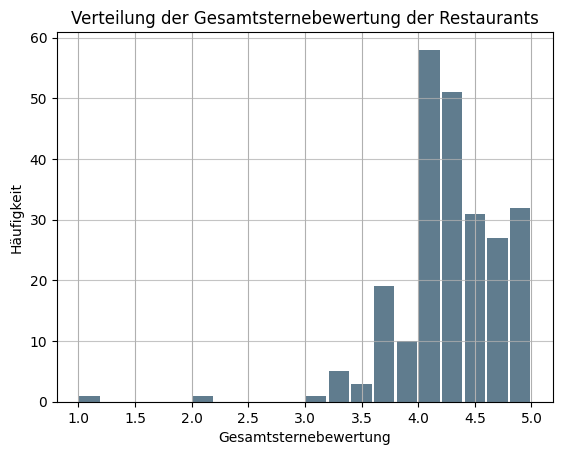

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Laden der Daten aus der CSV-Datei
df = pd.read_csv('restaurant_data_zuerich.csv', sep=',', encoding='utf-8')

# Überprüfen, ob die Spalte 'total_stars' im DataFrame vorhanden ist
print("Spalten im DataFrame:", df.columns)
print("Ist 'total_stars' in den Spalten:", 'total_stars' in df.columns)

# Erstellen des Histogramms für die Gesamtsternebewertung
df['total_stars'].plot.hist(grid=True, 
                            bins=20, 
                            rwidth=0.9,
                            color='#607c8e')

# Hinzufügen von Titel und Achsenbeschriftungen
plt.title('Verteilung der Gesamtsternebewertung der Restaurants')
plt.xlabel('Gesamtsternebewertung')
plt.ylabel('Häufigkeit')

# Aktivieren des Gitters
plt.grid(axis='y', alpha=0.75)

# Anzeigen des Plots
plt.show()


## Close db connection (if open)

In [8]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1018-azure
Datetime: 2024-01-10 20:57:57
Python Version: 3.10.13
-----------------------------------
